In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder

In [ ]:
def wrangle(filepath):
    #read csv file into datafram
    df=pd.read_csv(filepath)
    #expad the area
    ##df["area1"] =df["area"].str.split(" | ", expand=True)[2]
    #df.drop(columns="area", inplace=True)
    return df

In [ ]:
df = wrangle("/content/train (1).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [ ]:
df.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
corr =df.select_dtypes("number").corr()
corr

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Length,0.000165,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


<Axes: >

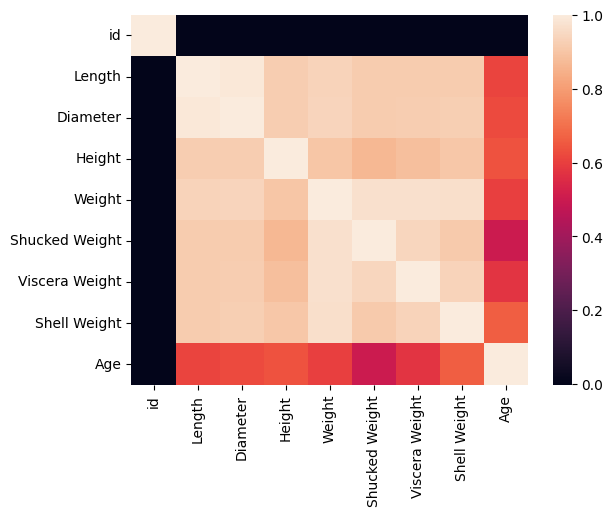

In [ ]:
import seaborn as sns
sns.heatmap(corr)

In [ ]:
target = "Age"
features = ["Length", "Diameter","Height", "Weight",	"Shucked Weight",	"Viscera Weight", "Shell Weight"]
y = df[target]
X = df[features]

In [ ]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
model =make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [ ]:
y_pred_training = model.predict(X_train)
mae_training =  mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 1.5


In [ ]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     8.830426
1    12.062506
2     4.676673
3     7.062652
4    12.888970
dtype: float64